In [1]:
import pandas as pd
import requests
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Heart Disease dataset

### 1. download the dataset (train and test files)

### 2. load and concatenate those datasets via pandas

In [2]:
# downloading directly from url
url = 'http://ps2.railsreactor.net/datasets/medicine/'

train_url = urljoin(url, 'heart_train.csv')
test_url = urljoin(url, 'heart_test.csv')

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

data = pd.concat([train, test])

3. print the dataset size and first rows from the dataset

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


### 4. print the lists of numeric, categorical and boolean columns

In [5]:
#shoul I include target variable?
data.drop('target', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 60
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [6]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical = ['cp', 'restecg', 'slope', 'thal']
boolean = ['sex', 'fbs', 'exang']

#check if all columns are used
sum([len(numerical), len(categorical), len(boolean)])

13

### 5. analyze values distribution <b>for each numerical column</b>

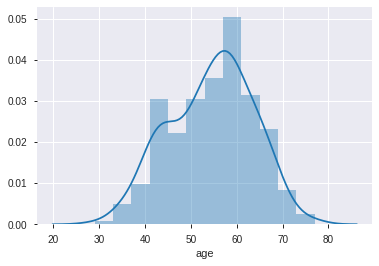

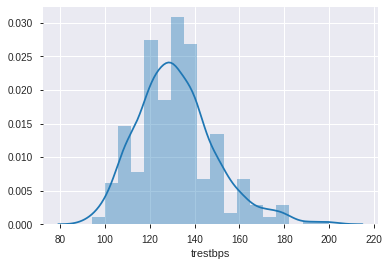

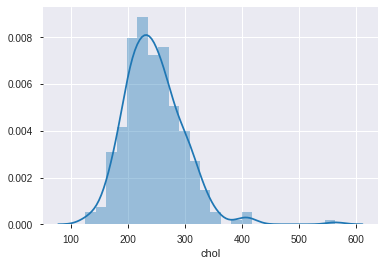

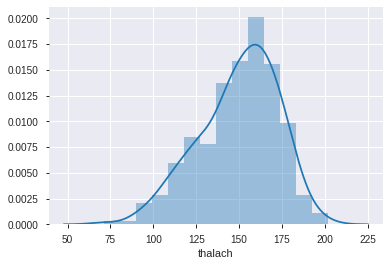

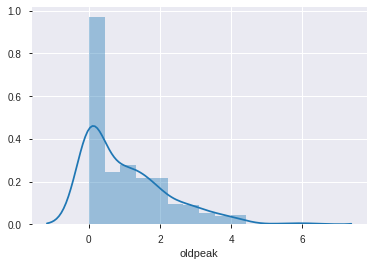

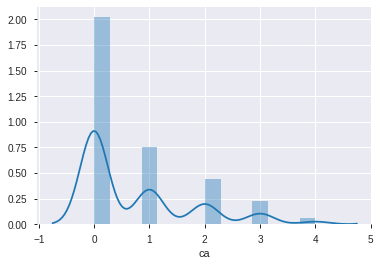

In [7]:
for col in numerical:
    sns.distplot(data[col])
    plt.show()

### 6. analyze frequency distribution of values <b>for each categorical and boolean columns</b>

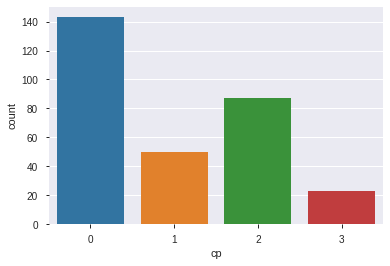

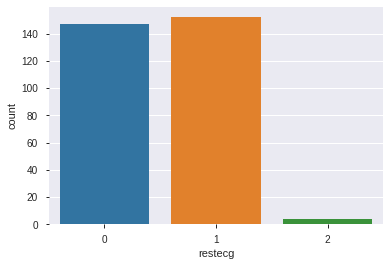

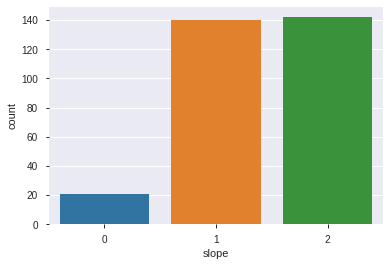

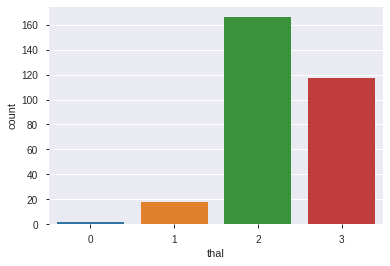

In [8]:
for col in categorical:
    sns.countplot(data[col])
    plt.show()

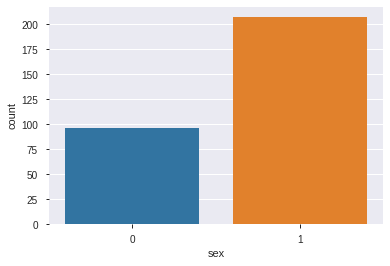

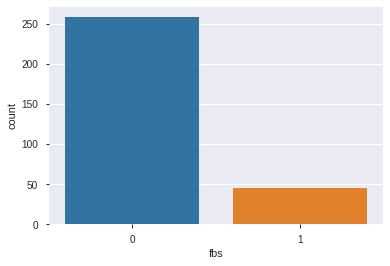

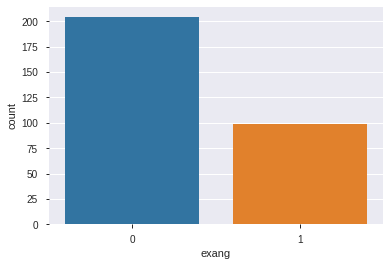

In [9]:
for col in boolean:
    sns.countplot(data[col])
    plt.show()

### 7. analyze correlation between columns

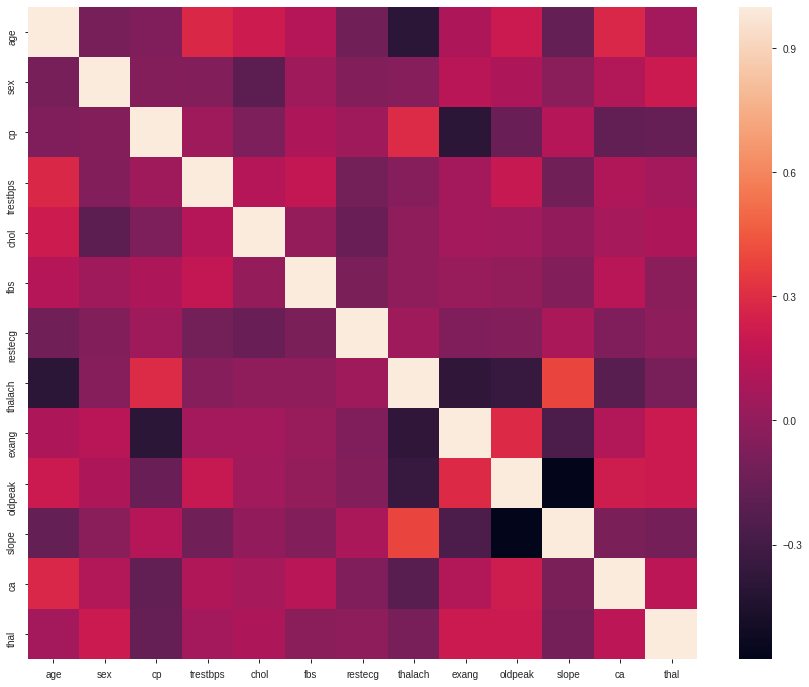

In [10]:
corr = data.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr);

In [11]:
corr


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


*there is high inverse relationship between oldpeak and slope (-0.577537) but maybe this is not enough for discarding*

**personal judgement:** I would try to use all columns for model 


### 8. perform preprocessing if needed (standardization, encodings etc)

In [12]:
def preprocess_dataset(df, numerical, categorical, boolean):
    
    #working with numerical data
    
    #should I scale ordinal data?
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df[numerical])
    scaled = pd.DataFrame(scaled, columns=numerical, index=df.index)
    
    #working with categorical data
    one_hot = pd.get_dummies(df[categorical], columns=categorical)

    return pd.concat([scaled, one_hot, df[boolean]], axis=1), scaler

df_prep, sc = preprocess_dataset(data,  numerical, categorical, boolean)

In [13]:
df_prep.head()

,age,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex,fbs,exang
0,1.613930,0.478391,-0.140381,0.059173,0.655990,1.244593,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1.283063,1.620649,-0.005102,-1.296472,-0.896862,2.224104,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,0.069886,-0.206964,-0.797447,-0.859167,0.828529,0.265082,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0.290464,-1.234996,1.714865,-0.290671,1.691225,0.265082,1,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,1.834507,-1.234996,0.362082,-0.859167,-0.896862,0.265082,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


### 9. generate automatic report for the dataset via [pandas_profiling](https://github.com/pandas-profiling/pandas-profiling) library

In [14]:
data.profile_report(style={'full_width':True})
